In [36]:
import tensorflow as tf
from tensorflow.keras.models import save_model, Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout,BatchNormalization
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator,img_to_array
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.titlesize': 'small'})


In [48]:
img_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [49]:

img_dir = 'C:/Users/Administrator/Desktop/nn_scratch/gen_imgs'

img_data_train = img_gen.flow_from_directory(
img_dir, 
target_size=(228,228), 
batch_size=32,
subset='training',
class_mode='categorical'
)

# validation split

validation_data = img_gen.flow_from_directory(
img_dir, 
target_size=(228,228), 
batch_size=32,
subset='validation',
class_mode='categorical'
)

Found 36564 images belonging to 7 classes.
Found 9140 images belonging to 7 classes.


In [50]:
batch = img_data_train.next()

# Extract the images and labels from the batch
images = batch[0]
img_labels = batch[1]

# Convert the labels to integers
img_labels = np.argmax(img_labels, axis=1)

In [51]:
img_labels

array([3, 1, 5, 4, 4, 2, 1, 1, 4, 3, 4, 4, 3, 0, 0, 5, 3, 3, 5, 6, 0, 3,
       6, 3, 0, 2, 4, 4, 3, 2, 3, 3], dtype=int64)

In [51]:
# split the data into train and test set
#x_train,x_test,y_train,y_test = train_test_split(images,img_labels, test_size=0.2,random_state=42)

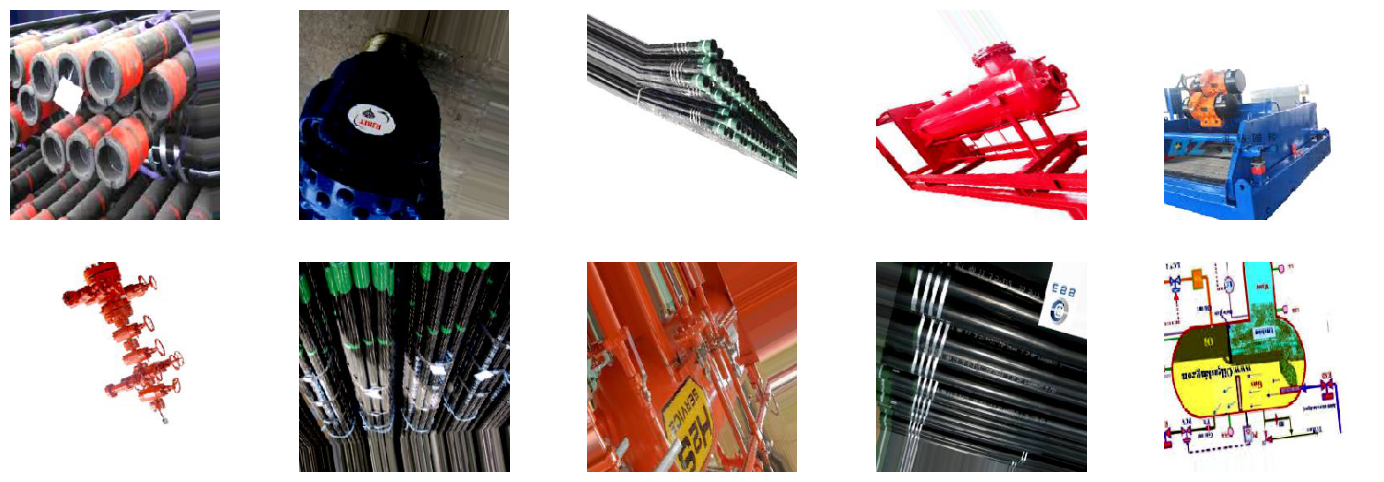

In [52]:
def plot_images(img_data):
    plt.figure(figsize=(18,6))
    for i in range(10):
        plt.subplot(2,5, i+1)
        batch =img_data.next()
        image = batch[0]
        plt.imshow(image[0])
        #plt.title(np.argmax(batch[1][i]),fontsize=20)
        plt.axis('off')
    plt.show()
    
plot_images(img_data_train)

## Build the Baseline CNN model

In [53]:
def get_cnn_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(228,228,3)))
    model.add(MaxPooling2D(2,2))
    

    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    
    model.add(Conv2D(128,(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
   
   
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7,activation='softmax'))
    
    return model

In [54]:
# define model
model = get_cnn_model()

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 113, 113, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 128)      

#### Calculation of parameters

* size of output CNN Layer
* size of maxpool layer
* number of parameter for cnn
* number of parameter for FCN

In [27]:
# size of output CNN layer
# input_size - (filter_size -1) when stride_size =1
# output_size = floor((input_size + 2*padding - (kernel_size -1)-1) /stride +1)

In [57]:
# 1st cnn layer, 1st maxpool layer
# input_size = 228
np.floor((228 + 2*0 - (3 -1)-1) /1 +1) , np.floor((226 + 2*0 - (2 -1)-1)/2 +1)

(226.0, 113.0)

In [59]:
# 2nd cnn layer, 2nd maxpool layer
# input_size = 113
np.floor((113 + 2*0 - (3 -1)-1) /1 +1) , np.floor((111 + 2*0 - (2 -1)-1)/2 +1)

(111.0, 55.0)

In [62]:
# 3rd cnn layer, 3rd maxpool layer
# input_size = 53
np.floor((55 + 2*0 - (3 -1)-1) /1 +1) , np.floor((53 + 2*0 - (2 -1)-1)/2 +1)

(53.0, 26.0)

In [40]:
# no. of parameters for CNN

# (prev layer channel* (filter_size * filter_size) +1)*channel in current layer
(3*(3*3) +1)*32, (32*(3*3) +1)*64, (64*(3*3) +1)*128

(896, 18496, 73856)

In [41]:
# no of parameters for FCN
# (# prev_input +1)*#cell_in_current_layer
(115200+1)*512

58982912

### Compile and train model

In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
from keras.callbacks import ModelCheckpoint

# create a callback that saves the best model
checkpoint = ModelCheckpoint('drilling_tools_classifier_best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [58]:
history =model.fit(img_data_train, epochs=5,validation_data=validation_data,callbacks=[checkpoint])


Epoch 1/5
1143/1143 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.7586
Epoch 1: val_accuracy improved from -inf to 0.63326, saving model to drilling_tools_classifier_best_model.h5
1143/1143 [==============================] - 2296s 2s/step - loss: 0.6775 - accuracy: 0.7586 - val_loss: 2.0337 - val_accuracy: 0.6333
Epoch 2/5
1143/1143 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9308
Epoch 2: val_accuracy improved from 0.63326 to 0.63589, saving model to drilling_tools_classifier_best_model.h5
1143/1143 [==============================] - 1927s 2s/step - loss: 0.2026 - accuracy: 0.9308 - val_loss: 2.7155 - val_accuracy: 0.6359
Epoch 3/5
1143/1143 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.9607
Epoch 3: val_accuracy improved from 0.63589 to 0.66138, saving model to drilling_tools_classifier_best_model.h5
1143/1143 [==============================] - 1857s 2s/step - loss: 0.1186 - accuracy: 0.9607 - val_loss: 2

In [46]:
model.evaluate(validation_data)

286/286 [==============================] - 361s 1s/step - loss: 1.8923 - accuracy: 0.6065


[1.8923193216323853, 0.6064551472663879]

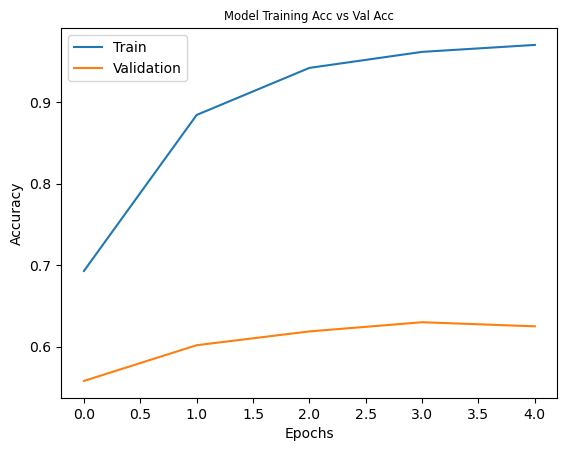

In [47]:
def plot_train_hist(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Training Acc vs Val Acc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train','Validation'])
    plt.show()
    
plot_train_hist(history)

In [23]:
#model.save('.h5')

### Prediction

In [24]:
# load model
model_load = tf.keras.models.load_model('drilling_tools_classifier_best_model.h5')

In [25]:
def predict_tool(path):
    
    img = tf.keras.preprocessing.image.load_img(path)
    # resize the image
    img = img.resize((228,228))
    image_arr = img_to_array(img)
    images = np.expand_dims(image_arr,axis=0)

    images = images/255

    prediction = model_load(images)

    TH = 0.5 # threshold
    predicted_index = int(prediction[0][0]>TH)
    label = { v:k for k,v in img_data_train.class_indices.items()}
    # show the image
    plt.imshow(img)
    plt.title('The model predicted the img as: {}'.format(label[predicted_index]),fontsize=20)
    plt.axis('off')
    return label[predicted_index]

'blowout preventor'

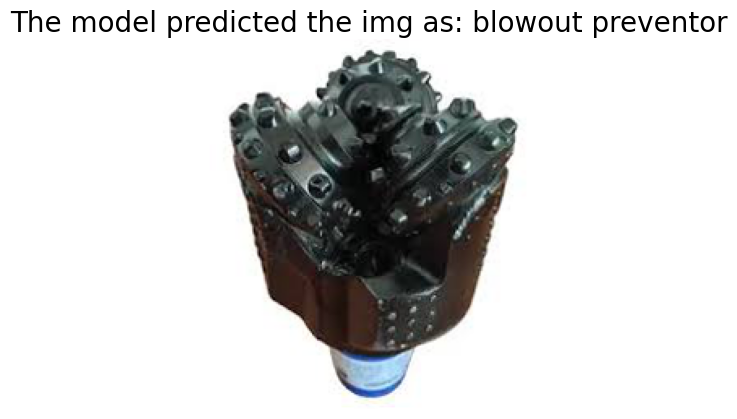

In [29]:
predict_tool('C:/Users/Administrator/Desktop/test_images/b1.jpg')